# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


* 주어진 데이터는 메일의 내용과 해당 메일이 스팸인지 아닌지를 분류해 놓은 데이터로, v1에는 스팸여부가 v2에는 해당 메일의 내용이 들어있다.
* 데이터의 결측치는 없는 것으로 확인된다.

<AxesSubplot:ylabel='v1'>

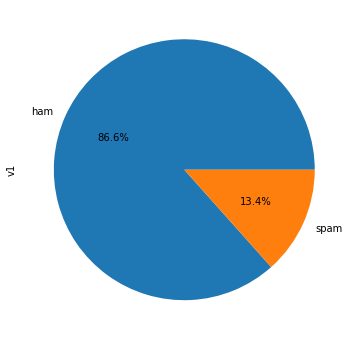

In [6]:
plt.figure(figsize=(10, 6))
spam['v1'].value_counts().plot.pie(autopct='%1.1f%%')

* 스팸메일과 정상메일의 비율은 위와 같이 나타난 것을 볼 수 있다.

## Tokenizing


In [7]:
import nltk

In [8]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [9]:
# 예시 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
print(word_tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from nltk.tokenize import WordPunctTokenizer

print(WordPunctTokenizer().tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']


* `wordPunctTokenizer`은 `word_tokenize`와 다르게 아포스트로피를 따로 분류하는 것을 알 수 있다. 또한 단위인 'å£'를 따로따로 분리하요 표기하였으며, 그 뒤에 오는 숫자도 '.'을 기준으로 분류하여 표기하였다. 하지만 `word_tokenize`는 å£1.50를 따로 분리하여 표기하지 않았고, 비교적 `wordPunctTokenizer`보다는 `word_tokenize`를 사용한 토큰화가 더 적합할 것 같다.

In [11]:
from nltk.tokenize import TreebankWordTokenizer

print(TreebankWordTokenizer().tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


* 같은 문장으로 토큰화를 진행해보았을 경우 `TreebankWordTokenizer`와 `word_tokenize`의 토큰화 는 같았고, 따라서 다른 문장을 통해 비교해보기로 하였다.

In [12]:
spam.iloc[6]['v2']

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [13]:
print(word_tokenize(spam.iloc[6]['v2']))

['Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', '.', 'They', 'treat', 'me', 'like', 'aids', 'patent', '.']


In [14]:
print(TreebankWordTokenizer().tokenize(spam.iloc[6]['v2']))

['Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me.', 'They', 'treat', 'me', 'like', 'aids', 'patent', '.']


* 이 문장의 경우 `TreebankWordTokenizer`은 구두점을 잘 분리해내지 못했으므로 `word_tokenize`가 더 적절하게 토큰화를 진행했다고 볼 수 있다. 따라서 `word_tokenize`를 통해 토큰화를 진행하기로 하였다.

In [15]:
import re

def cleanText(data) :
    text = re.sub('[^a-zA-Z]', ' ', data).lower() 
    return text

spam['v2'] = spam['v2'].apply(cleanText)

* 토큰화를 진행하기 전에 특수문자 제거를 진행하였고, 대문자를 모두 소문자로 바꾸어주었다.

In [16]:
spam['v2'] = spam['v2'].apply(nltk.tokenize.word_tokenize)

In [17]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))

result = []
for words in spam['v2']: 
    x = [word for word in words if word not in stop_words]
    result.append(x) 

spam['v2'] = result
print(spam['v2'])

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: v2, Length: 5572, dtype: object


* 토큰화를 진행한 후 불용어를 제거해주었다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [18]:
import gensim
from gensim.models import Word2Vec, FastText
from glove import Corpus, Glove
import scipy.stats as st

### 1. word2vec - skipgram

* 스팸메일과 정상메일에 대한 차이를 확인하기 위해 둘을 분리하여 임베딩을 진행하였다.

**스팸 메일**

In [19]:
# Word2Vec의 하이퍼파라미터값중 sg=0은 cbow이고,  sg=1은 skipgram이다.
model = Word2Vec(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=1)

In [20]:
model.save('w2v_skipgram_spam')

In [21]:
w2v_skipgram_spam = Word2Vec.load('w2v_skipgram_spam')

In [22]:
x = w2v_skipgram_spam.wv.most_similar(positive=["hours"], topn=10)
x

[('reward', 0.7053911089897156),
 ('weekends', 0.6542564034461975),
 ('talk', 0.6295075416564941),
 ('hrs', 0.5855376124382019),
 ('valid', 0.5722076892852783),
 ('code', 0.550179123878479),
 ('valued', 0.5334563255310059),
 ('inc', 0.5319531559944153),
 ('use', 0.5108287930488586),
 ('quoting', 0.5094490051269531)]

In [23]:
x = list(zip(*x))[0]

**정상 메일**

In [24]:
model = Word2Vec(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=1)

In [25]:
model.save('w2v_skipgram_ham')

In [26]:
w2v_skipgram_ham = Word2Vec.load('w2v_skipgram_ham')

In [27]:
y = w2v_skipgram_ham.wv.most_similar(positive=["hours"], topn=10)
y

[('waking', 0.4556938111782074),
 ('meds', 0.4029034376144409),
 ('askd', 0.3915078341960907),
 ('internet', 0.36985406279563904),
 ('double', 0.36923807859420776),
 ('worry', 0.36348021030426025),
 ('slept', 0.3581455945968628),
 ('bed', 0.35751911997795105),
 ('sec', 0.35688093304634094),
 ('questions', 0.35647594928741455)]

In [28]:
y = list(zip(*y))[0]

### 2. word2vec - CBOW

**스팸 메일**

In [29]:
model = Word2Vec(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=0)

In [30]:
model.save('w2v_CBOW_spam')

In [31]:
w2v_CBOW_spam = Word2Vec.load('w2v_CBOW_spam')

In [32]:
x1 = w2v_CBOW_spam.wv.most_similar(positive=["hours"], topn=10)
x1

[('reward', 0.8409174680709839),
 ('hrs', 0.6258618831634521),
 ('inc', 0.5883572697639465),
 ('talk', 0.5607752799987793),
 ('weekends', 0.5286056399345398),
 ('valued', 0.5267312526702881),
 ('code', 0.5263552069664001),
 ('use', 0.521956741809845),
 ('rates', 0.4740886092185974),
 ('shows', 0.4666745364665985)]

In [33]:
x1 = list(zip(*x1))[0]

**정상 메일**

In [34]:
model = Word2Vec(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=0)

In [35]:
model.save('w2v_CBOW_ham')

In [36]:
w2v_CBOW_ham = Word2Vec.load('w2v_CBOW_ham')

In [37]:
y1 = w2v_CBOW_ham.wv.most_similar(positive=["hours"], topn=10)
y1

[('meds', 0.4096231162548065),
 ('sitting', 0.3850100338459015),
 ('question', 0.3415350615978241),
 ('minutes', 0.3224484622478485),
 ('waking', 0.31763163208961487),
 ('quick', 0.30806204676628113),
 ('months', 0.29912012815475464),
 ('worry', 0.28315719962120056),
 ('reason', 0.27577927708625793),
 ('everyone', 0.27447953820228577)]

In [38]:
y1 = list(zip(*y1))[0]

### 3. FastText Tutorial

* 임베딩 모델간의 비교를 위하여 파라미터값은 고정시킨 채 학습을 진행하였다.

**스팸 메일**

In [39]:
model = FastText(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size =100, window=10)

In [40]:
model.save('ft_spam')

In [41]:
ft_spam = FastText.load('ft_spam')

In [42]:
x2 = ft_spam.wv.most_similar(positive=["hours"], topn=10)
x2

[('please', 0.9998738765716553),
 ('pound', 0.9998723268508911),
 ('sexy', 0.9998716711997986),
 ('records', 0.9998708367347717),
 ('service', 0.9998708367347717),
 ('services', 0.9998692274093628),
 ('contacted', 0.9998688697814941),
 ('min', 0.9998677968978882),
 ('selected', 0.9998675584793091),
 ('receive', 0.9998675584793091)]

In [43]:
x2 = list(zip(*x2))[0]

**정상 메일**

In [44]:
model = FastText(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size =100, window=10)

In [45]:
model.save('ft_ham')

In [46]:
ft_ham = FastText.load('ft_ham')

In [47]:
y2 = ft_ham.wv.most_similar(positive=["hours"], topn=10)
y2

[('hour', 0.9999818205833435),
 ('thought', 0.9999756217002869),
 ('lost', 0.9999738335609436),
 ('wer', 0.9999730587005615),
 ('someone', 0.9999725222587585),
 ('less', 0.9999723434448242),
 ('lover', 0.9999723434448242),
 ('red', 0.9999721646308899),
 ('sometimes', 0.9999719858169556),
 ('never', 0.9999719262123108)]

In [48]:
y2 = list(zip(*y2))[0]

### 4. GloVe

**스팸 메일**

In [49]:
corpus = Corpus()
corpus.fit(spam[spam['v1'] == 'spam']['v2'], window=10)

In [50]:
model = Glove(no_components=100, learning_rate=0.01)     
model.fit(corpus.matrix, epochs=200, no_threads=4, verbose=False)
model.add_dictionary(corpus.dictionary)

In [51]:
model.save('glv_spam')

In [52]:
glv_spam = Glove.load('glv_spam')

In [53]:
x3 = glv_spam.most_similar("hours")
x3

[('hi', 0.9398042124626267),
 ('girls', 0.939417010746672),
 ('best', 0.9367799437325298),
 ('talk', 0.9351275123147728)]

In [54]:
x3 = list(zip(*x3))[0]

**정상 메일**

In [55]:
corpus = Corpus()
corpus.fit(spam[spam['v1'] == 'ham']['v2'], window=10)

In [56]:
model = Glove(no_components=100, learning_rate=0.01)     
model.fit(corpus.matrix, epochs=200, no_threads=4, verbose=False)
model.add_dictionary(corpus.dictionary)

In [57]:
model.save('glv_ham')

In [58]:
glv_ham = Glove.load('glv_ham')

In [59]:
y3 = glv_ham.most_similar("hours")
y3

[('charge', 0.9427657668981831),
 ('ish', 0.9420980040003931),
 ('balance', 0.9366982464559872),
 ('irritating', 0.9259968658064743)]

In [60]:
y3 = list(zip(*y3))[0]

* 4가지 임베딩 방법의 비교를 위해 스팸메일과 정상메일에서 `hours`와 연관되어 있는 단어에 어떤 단어들이 학습되었는지 표로 만들어보았다.

In [61]:
#스팸 메일
result_dict = {'w2v_skipgram_spam' : x,
                      'w2v_CBOW_spam' : x1,
                      'ft_spam' : x2,
                      'glv_spam' : x3}
result = pd.DataFrame.from_dict(result_dict, orient='index')                    
result = result.transpose()
result

,w2v_skipgram_spam,w2v_CBOW_spam,ft_spam,glv_spam
0,reward,reward,please,hi
1,weekends,hrs,pound,girls
2,talk,inc,sexy,best
3,hrs,talk,records,talk
4,valid,weekends,service,None
5,code,valued,services,None
6,valued,code,contacted,None
7,inc,use,min,None
8,use,rates,selected,None
9,quoting,shows,receive,None


* `skipgram`과 `CBOW` 같은 경우 순위는 조금씩 다르지만 거의 같은 단어들이 학습된 것을 알 수 있으며, `skipgram`은 quoting을 `CBOW`는 shows를 연관되어 있다고 판단한 것을 제외하면 다른 단어들은 모두 같다. 또한 순위를 보았을 때 `CBOW`는 hrs, inc와 같은 hours와 직접적으로 연관되어 있는 단어들이 비교적 위 순위를 차지한 것으로 보아 위 코퍼스에 적합한 임베딩이 되었다고 볼 수 있다.
* `GLOVE`와 `FastText`의 경우는 word2vec으로 임베딩을 진행했을 때와 다르게 전혀 연관이 없는 단어들이 학습된 것을 보아 조금 더 나은 결과를 위해 하이퍼파라미터를 조금씩 변경한 후 추가 학습을 진행해보았지만, 결과는 크게 달라지지 않았다. 따라서 위 코퍼스에 적합한 임베딩이 되지 않았다고 판단하였다.

In [62]:
#정상 메일
result_dict = {'w2v_skipgram_ham' : y,
                      'w2v_CBOW_ham' : y1,
                      'ft_ham' : y2,
                      'glv_ham' : y3}
result = pd.DataFrame.from_dict(result_dict, orient='index')                    
result = result.transpose()
result

,w2v_skipgram_ham,w2v_CBOW_ham,ft_ham,glv_ham
0,waking,meds,hour,charge
1,meds,sitting,thought,ish
2,askd,question,lost,balance
3,internet,minutes,wer,irritating
4,double,waking,someone,None
5,worry,quick,less,None
6,slept,months,lover,None
7,bed,worry,red,None
8,sec,reason,sometimes,None
9,questions,everyone,never,None


* 정상메일의 경우 스펨메일과는 학습된 단어들이 많이 다른 것을 알 수 있다.
* 스팸메일의 경우 `skipgram`과 `CBOW`가 비슷한 결과를 도출한 것과는 다르게, 이번에는 다른 단어들을 추출하였으며, 둘 다 sec나 minutes 와 같은 단어가 순위에 올라와 있는 것으로 보아 학습이 잘 되었다고 판단하였다.
* `FastText`의 경우 스펨메일에서와 다르게 정상메일에선 비교적 연관있는 단어들을 학습하였고, `GLOVE`는 여전히 연관성이 전혀 없는 단어들만 추출하였다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### WordCloud

(-0.5, 999.5, 599.5, -0.5)

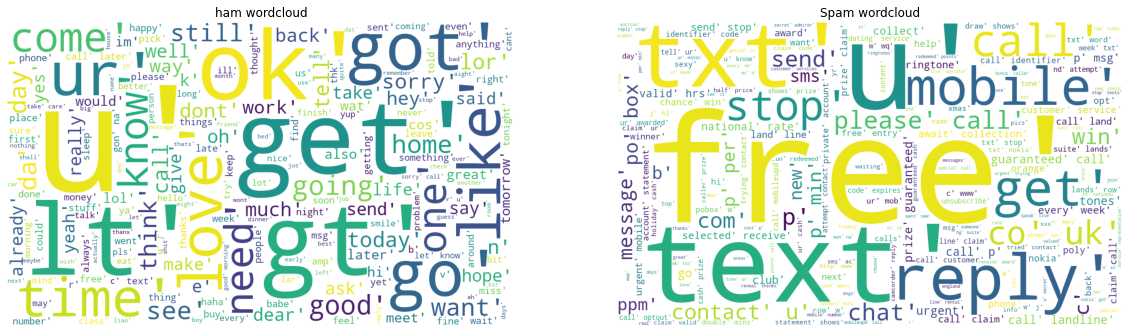

In [69]:
from wordcloud import WordCloud

ham_ = ""
for j in spam[spam['v1'] == 'ham']['v2']:
    ham_ = ham_ + str(j) + " "


spam_ = ""
for j in spam[spam['v1'] == 'spam']['v2']:
    spam_ = spam_ + str(j) + " "
    

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('ham wordcloud')
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(ham_))
plt.axis("off")

plt.subplot(1,2,2)
plt.title('Spam wordcloud')
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(spam_))
plt.axis("off")

* 스팸메일과 정상메일의 워드클라우드를 그려본 결과 정상메일의 경우 가장 많이 나온 단어 중 눈에 띄는 단어가 없었던 반면, 스팸메일은 free, text, reply, mobile, call과 같은 단어들이 많았다.
* 스팸메일에서 free, text, reply, mobile, call 과 같은 단어들이 많이 나온 것을 보면 사용자들에게 무료라고 속이거나, 답을 요구하는 경우가 많았음을 알 수 있고, 워드클라우드를 통해 비교해보니 확실히 정상메일과 스팸메일에 차이가 있는 것을 확인할 수 있었다.

#### **단어 비교**

In [77]:
a = w2v_skipgram_spam.wv.most_similar(positive=["free"], topn=10)
a1 = w2v_CBOW_spam.wv.most_similar(positive=["free"], topn=10)
a2 = ft_spam.wv.most_similar(positive=["free"], topn=10)
a3 = glv_spam.most_similar("free")

a = list(zip(*a))[0]
a1 = list(zip(*a1))[0]
a2 = list(zip(*a2))[0]
a3 = list(zip(*a3))[0]

dict = {'skipgram' : a,
                      'CBOW' : a1,
                      'ft' : a2,
                      'glv' : a3}
result = pd.DataFrame.from_dict(dict, orient='index')                    
result = result.transpose()
result

,skipgram,CBOW,ft,glv
0,get,latest,freephone,minutes
1,stoptxt,gr,call,entry
2,price,keep,replying,update
3,tariffs,subscription,videophones,bluetooth
4,plus,plus,phone,None
5,december,sport,calling,None
6,update,mths,latest,None
7,texts,minutes,caller,None
8,hey,get,contacted,None
9,half,tariffs,reply,None


* 워드클라우드를 통해 스팸메일에서 가장 많이 등장한 단어는 free인 것을 알수 있었고, 따라서 이와 관련된 단어를 한 번 확인해보고자 하였다.
* 임베딩을 통해 학습된 단어들을 확인해본 결과 fasttext의 경우 call, reply, phone과 유사한 단어들이 많이 등장한 것을 알 수 있었으며, 이를 통해 스팸메일에서는 사용자들을 무료라고 현혹하며 답을 요구한 것을 명확하게 알 수 있었다.
* glove에서는 entry나 update같은 단어가 등장한 것으로 보아 사용자들을 무료라고 현혹하며 다른 사이트로의 접속을 유도해 사기를 친 것이라고 생각해볼 수 있었다.
* word2vec모델에서는 크게 두드러지는 단어가 보이진 않았다.

#### **이진 분류**

* 이번 데이터는 스팸메일과 정상메일에 대한 라벨링이 되어 있기 때문에 이진 분류를 진행해보았다.  모델은 앞선 정규세션에서 배웠던 나이브 베이즈 분류기를 이용하였다.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()

vector = []
for i in spam['v2']:
    sentence = ""
    for j in i:sentence = sentence + str(j) + " " 
    vector.append(sentence)

vector = vectorizer.fit_transform(vector)

* 분류 학습을 위해 먼저 벡터화를 시켜주어야 한다. 위에서 전처리를 진행했기 때문에 원 문장을 그대로 사용하지 않고 전처리가 진행된 토큰을 다시 문장으로 연결시킨 후 사이킷런에서 제공하는 TF-IDF 벡터화를 진행해주었다.

In [101]:
# train/test 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(vector,spam['v1'],test_size=0.2, random_state=0)

In [102]:
mod = MultinomialNB()
mod.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predicted = mod.predict(X_test)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.9560538116591928


* 전처리한 문장을 사용한 결과 스팸메일과 정상메일의 분류 정확도가 0.956으로 높게 나왔다.